# MULTI-ARMED BANDITS

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_distribution

 # Beta distributions to model uncertainty about probabilities

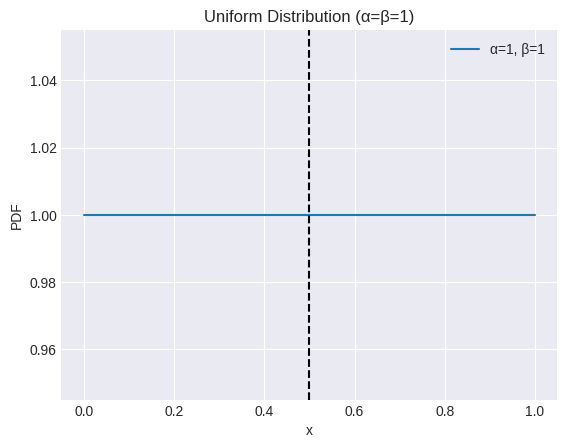

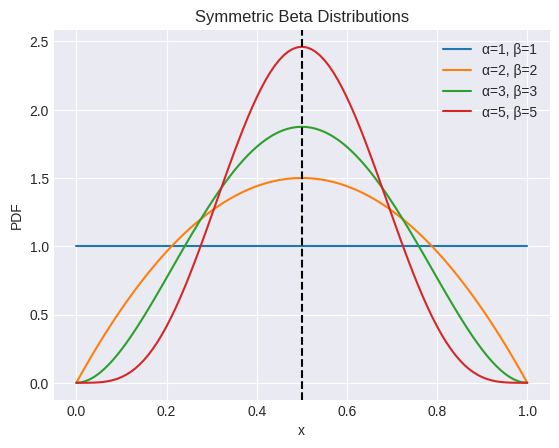

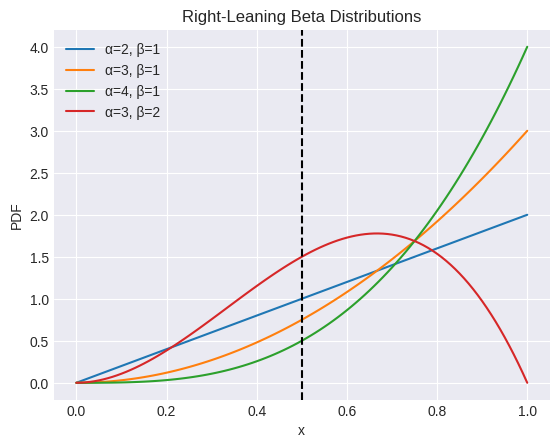

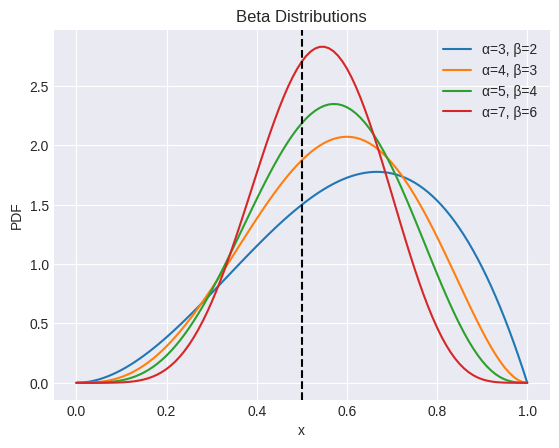

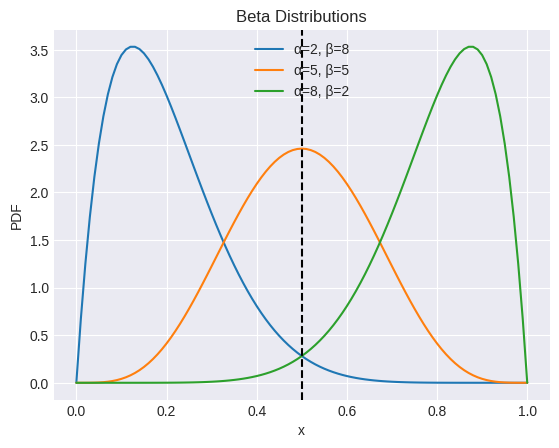

In [17]:
def beta_x(x, alpha, beta_val):
    return beta_distribution.pdf(x, alpha, beta_val)

def plot_beta_distributions(alphas, betas, title, filename):
    x = np.linspace(0, 1, 101)
    plt.figure()

    for alpha, beta_val in zip(alphas, betas):
        y = beta_x(x, alpha, beta_val)
        plt.plot(x, y, label=f'α={alpha}, β={beta_val}')

    plt.axvline(x=0.5, color='k', linestyle='--')  # Vertical line at x=0.5
    # plt.xlim(0, 1)
    # plt.ylim(0, 3)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title(title)
    plt.legend()
    plt.savefig(filename)
    plt.show()

# Uniform distribution a = b = 1
plot_beta_distributions([1], [1], 'Uniform Distribution (α=β=1)', '11.png')

# Symmetric distributions about x = 1/2 when a = b
plot_beta_distributions([1, 2, 3, 5], [1, 2, 3, 5], 'Symmetric Beta Distributions', '12.png')

# Right-leaning distributions when a > b
plot_beta_distributions([2, 3, 4, 3], [1, 1, 1, 2], 'Right-Leaning Beta Distributions', '13.png')

# Plot for the specified alpha and beta values
plot_beta_distributions([3, 4, 5, 7], [2, 3, 4, 6], 'Beta Distributions', '14.png')

# Plot for the specified alpha and beta values
plot_beta_distributions([2, 5, 8], [8, 5, 2], 'Beta Distributions', '14.png')

# Thompson’s Bayesian update rule

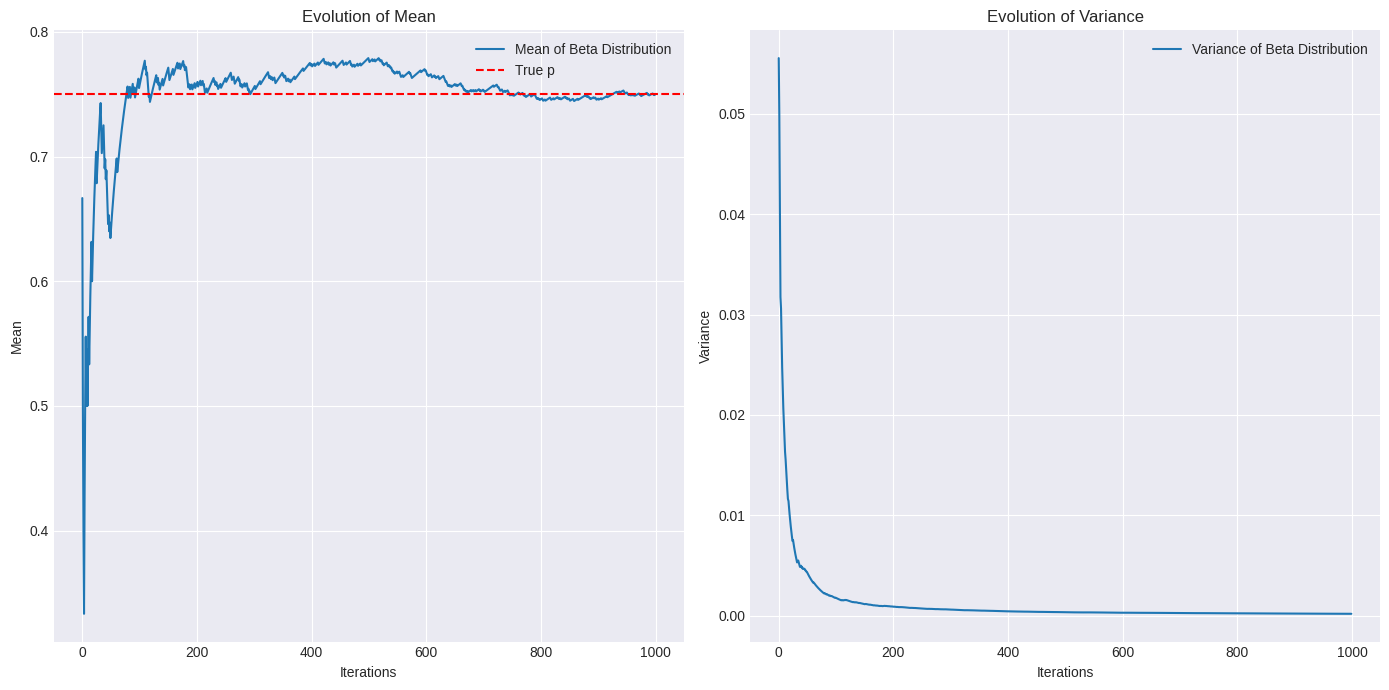

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_distribution

# Function to simulate a bandit arm pull
def pull_bandit_arm(p):
    return np.random.rand() < p

# Function to update alpha and beta using Thompson's rule
def update_parameters(alpha, beta, reward):
    return alpha + reward, beta + (1 - reward)

# Function to calculate mean and variance of beta distribution
def beta_stats(alpha, beta):
    mean = alpha / (alpha + beta)
    variance = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))
    return mean, variance

# Set the true probability of success for the bandit arm
true_p = 0.75
iterations = 1000

# Initialize alpha and beta
alpha, beta = 1, 1

# Store the evolution of mean and variance
mean_history = []
variance_history = []

# Simulate the process
for _ in range(iterations):
    reward = pull_bandit_arm(true_p)
    alpha, beta = update_parameters(alpha, beta, reward)
    mean, variance = beta_stats(alpha, beta)
    mean_history.append(mean)
    variance_history.append(variance)

# Plot the evolution of mean and variance
plt.figure(figsize=(14, 7))

# Plot mean
plt.subplot(1, 2, 1)
plt.plot(mean_history, label='Mean of Beta Distribution')
plt.axhline(y=true_p, color='r', linestyle='--', label='True p')
plt.xlabel('Iterations')
plt.ylabel('Mean')
plt.title('Evolution of Mean')
plt.legend()

# Plot variance
plt.subplot(1, 2, 2)
plt.plot(variance_history, label='Variance of Beta Distribution')
plt.xlabel('Iterations')
plt.ylabel('Variance')
plt.title('Evolution of Variance')
plt.legend()

plt.tight_layout()
plt.show()


#  Thompson sampling for K-armed bandit Problem

In [21]:
import numpy as np
from scipy.stats import beta

# Number of arms
K = 3

# Initialize alpha and beta parameters for each arm
alpha = np.ones(K)
beta = np.ones(K)

# Function to perform one iteration of Thompson Sampling
def thompson_sampling(alpha, beta):
    # Step 1: Sample from the beta distributions
    samples = [np.random.beta(alpha[k], beta[k]) for k in range(K)]

    # Step 2: Determine the arm with the maximum sample
    k_max = np.argmax(samples)

    # Simulate pulling the arm
    # Assuming an equal chance for reward (0 or 1) for demonstration
    reward = np.random.randint(0, 2)

    # Step 3: Update alpha and beta based on the reward
    alpha[k_max] += reward
    beta[k_max] += (1 - reward)

    return k_max, reward, alpha, beta

# running one iteration
k_max, reward, updated_alpha, updated_beta = thompson_sampling(alpha, beta)
k_max, reward, updated_alpha, updated_beta



(2, 0, array([1., 1., 1.]), array([1., 1., 2.]))

In [32]:
# Define the true reward probabilities for each arm (for simulation purposes)
true_reward_probabilities = np.array([0.3, 0.5, 0.7])

# Number of iterations for the experiment
iterations = 1000

# Implement the UCB algorithm
def ucb_selection(counts, rewards_sum, c):
    total_pulls = np.sum(counts)
    ucb_values = rewards_sum / counts + c * np.sqrt(np.log(total_pulls) / counts)
    return np.argmax(ucb_values)

# Initialize variables for Thompson Sampling
alpha_ts = np.ones(K)
beta_ts = np.ones(K)
rewards_ts = np.zeros(iterations)
total_rewards_ts = np.zeros(iterations)

# Initialize variables for UCB
counts_ucb = np.ones(K) # Initialize with 1 to avoid division by zero
rewards_sum_ucb = np.zeros(K)
rewards_ucb = np.zeros(iterations)
total_rewards_ucb = np.zeros(iterations)
c_values = [0.01, 0.1,0.5] # Different values of hyperparameter c for UCB

# Function to simulate pulling an arm
def pull_arm(probability):
    return np.random.rand() < probability

# Simulate the process
for t in range(iterations):
    # Thompson Sampling
    k_ts, reward_ts, alpha_ts, beta_ts = thompson_sampling(alpha_ts, beta_ts)
    rewards_ts[t] = pull_arm(true_reward_probabilities[k_ts])
    total_rewards_ts[t] = np.sum(rewards_ts)

    # UCB for each c value
    for c in c_values:
        k_ucb = ucb_selection(counts_ucb, rewards_sum_ucb, c)
        reward_ucb = pull_arm(true_reward_probabilities[k_ucb])
        counts_ucb[k_ucb] += 1
        rewards_sum_ucb[k_ucb] += reward_ucb
        rewards_ucb[t] = reward_ucb
        total_rewards_ucb[t] = np.sum(rewards_ucb)

# Calculate total regret
optimal_rewards = np.max(true_reward_probabilities) * iterations
total_regret_ts = optimal_rewards - total_rewards_ts
total_regret_ucb = {c: optimal_rewards - total_rewards_ucb for c in c_values}

# total_regret_ts, total_regret_ucb



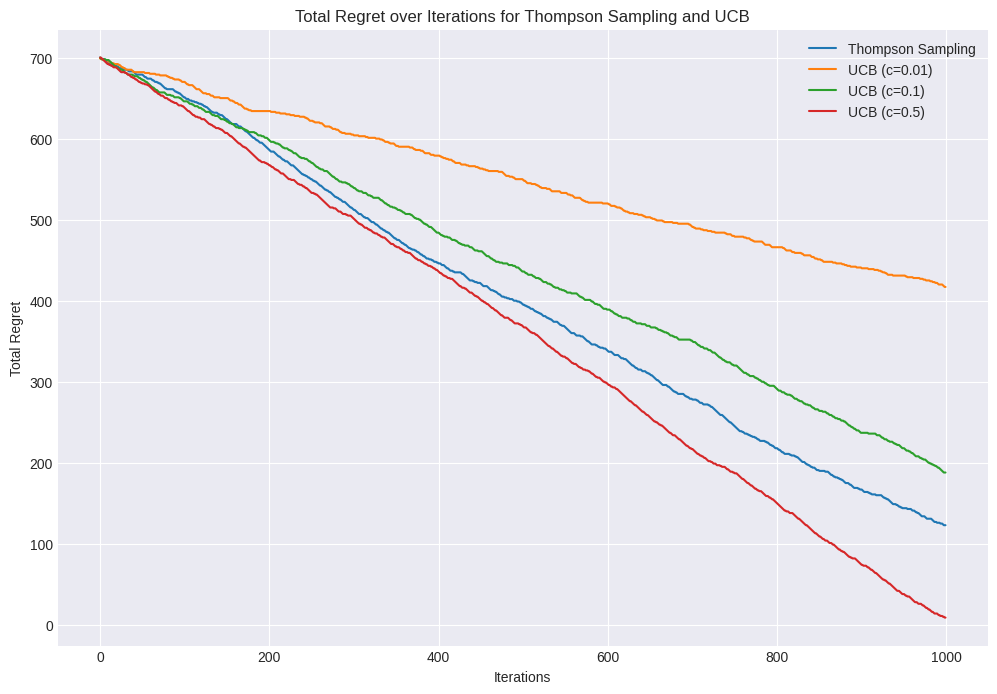

In [33]:

plt.figure(figsize=(12, 8))
plt.plot(total_regret_ts, label="Thompson Sampling")

# Each UCB setting (c value) needs its own total rewards tracking
total_rewards_ucb_all = {c: np.zeros(iterations) for c in c_values}

# Re-run UCB for each c value
for c in c_values:
    # Reset the counts and rewards sum for each run
    counts_ucb = np.ones(K)
    rewards_sum_ucb = np.zeros(K)

    for t in range(iterations):
        k_ucb = ucb_selection(counts_ucb, rewards_sum_ucb, c)
        reward_ucb = pull_arm(true_reward_probabilities[k_ucb])
        counts_ucb[k_ucb] += 1
        rewards_sum_ucb[k_ucb] += reward_ucb
        total_rewards_ucb_all[c][t] = np.sum(rewards_sum_ucb)

    # Calculate and plot total regret for each c
    total_regret_ucb = optimal_rewards - total_rewards_ucb_all[c]
    plt.plot(total_regret_ucb, label=f"UCB (c={c})")

plt.xlabel("Iterations")
plt.ylabel("Total Regret")
plt.title("Total Regret over Iterations for Thompson Sampling and UCB")
plt.legend()
plt.show()